In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [28]:
TRAIN_DIR = '/kaggle/input/facial-expression-dataset/train/train'
TEST_DIR = '/kaggle/input/facial-expression-dataset/test/test'

In [29]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, label)):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label, 'Completed')
        
    return image_paths, labels

In [30]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
## Shaffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


image    label
0  /kaggle/input/facial-expression-dataset/train/...    happy
1  /kaggle/input/facial-expression-dataset/train/...  neutral
2  /kaggle/input/facial-expression-dataset/train/...     fear
3  /kaggle/input/facial-expression-dataset/train/...     fear
4  /kaggle/input/facial-expression-dataset/train/...    happy

In [31]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


image     label
0  /kaggle/input/facial-expression-dataset/test/t...  surprise
1  /kaggle/input/facial-expression-dataset/test/t...  surprise
2  /kaggle/input/facial-expression-dataset/test/t...  surprise
3  /kaggle/input/facial-expression-dataset/test/t...  surprise
4  /kaggle/input/facial-expression-dataset/test/t...  surprise

<Axes: xlabel='label', ylabel='count'>

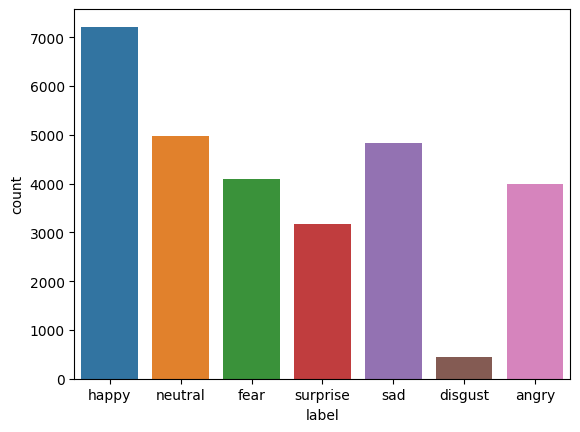

In [32]:
sns.countplot(train, x='label')

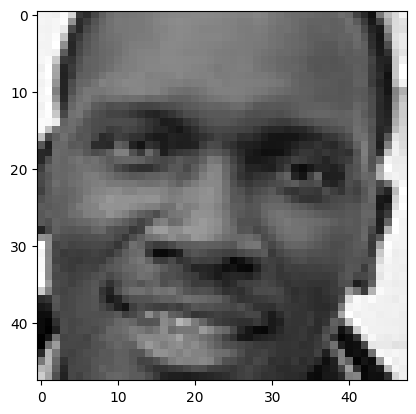

In [33]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')

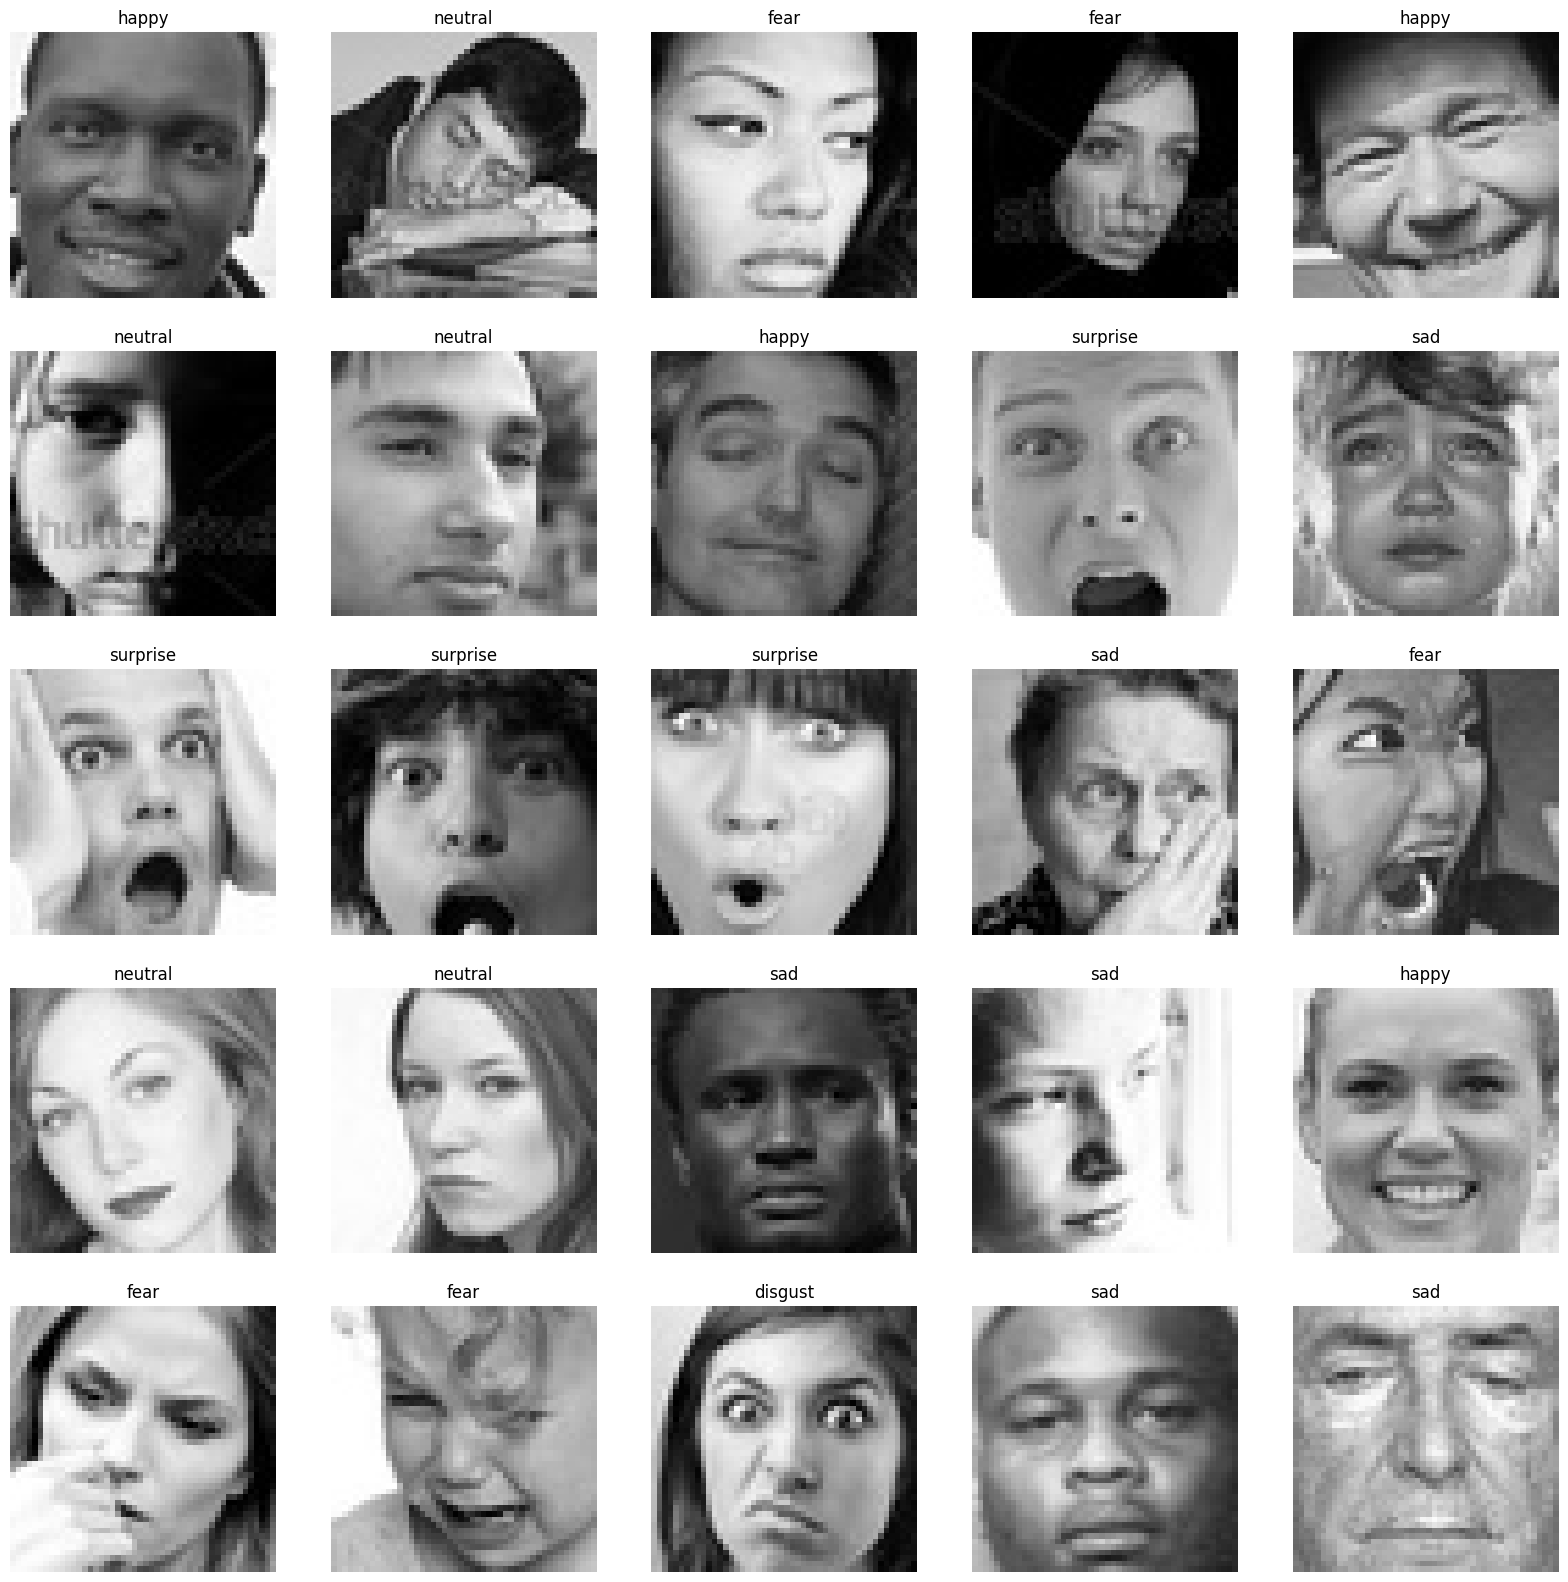

In [34]:
## To display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction


In [35]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [36]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [37]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [38]:
## Normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [39]:
## Convert Label to Integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [40]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [41]:
# Config
input_shape = (48, 48, 1)
output_class = 7

In [43]:
## MODEL CREATION
model = Sequential()
## Convolutional Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
## Train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


I0000 00:00:1725947064.584806    1628 service.cc:145] XLA service 0x7d0b3c002890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725947064.584871    1628 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  6/225 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1828 - loss: 1.9430 

I0000 00:00:1725947076.923597    1628 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.2358 - loss: 1.8393 - val_accuracy: 0.2471 - val_loss: 1.8148
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2512 - loss: 1.7997 - val_accuracy: 0.2813 - val_loss: 1.7420
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2965 - loss: 1.7284 - val_accuracy: 0.3879 - val_loss: 1.6098
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3528 - loss: 1.6235 - val_accuracy: 0.4278 - val_loss: 1.4772
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4028 - loss: 1.5263 - val_accuracy: 0.4628 - val_loss: 1.3952
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4334 - loss: 1.4676 - val_accuracy: 0.4889 - val_loss: 1.3280
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4524 - loss: 1.4226 - val_accuracy: 0.4791 - val_loss: 1.3267
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4658 - loss: 1.3922 - val_accura

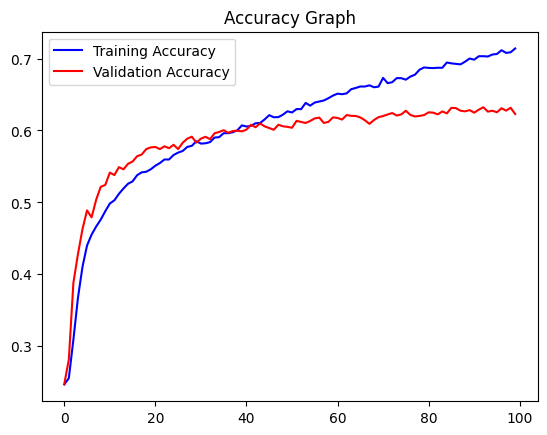

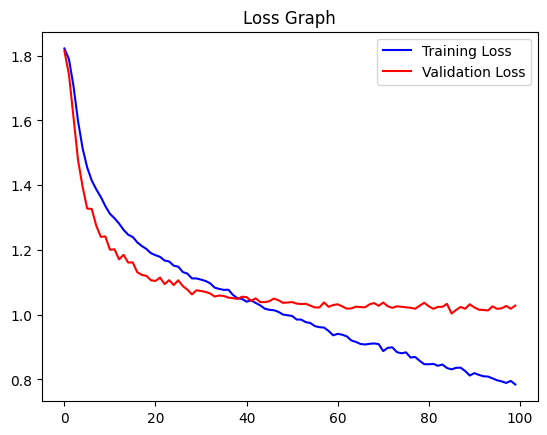

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()

plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

In [ ]:
## Test with Image Data


Original Output:  surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Output:  surprise


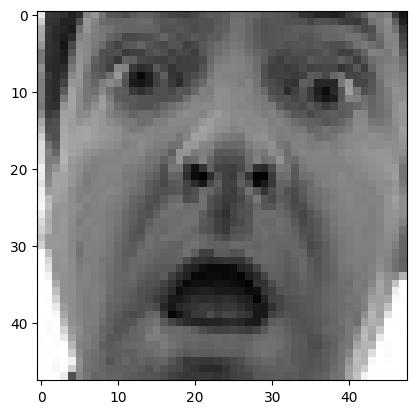

In [63]:
image_index = random.randint(0, len(test))
print('Original Output: ', test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output: ", prediction_label)
plt.imshow(x_test[image_index].reshape(48,48), cmap='gray');